In [18]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools as itr
import pprint, pickle

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [19]:
name='Geemanthi evidence 1'
direction='right'

In [20]:
cap = cv2.VideoCapture("/home/jayasanka/Documents/gait recognition/evidence data/{}.mp4".format(name))

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret:

            #set specific frames sequence by vedio
            #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)

            # Recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Make Detections
            results = holistic.process(image)
            # print(results.face_landmarks)

            # Recolor image back to BGR for rendering
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
            #print(results.pose_landmarks)
            #print("--------------------------------------")

            if results.pose_landmarks != None:
                key_list= []
                t=time.time()
                for data_point in results.pose_landmarks.landmark:
                    key_list.append([data_point.x,data_point.y,data_point.z,t])    
                mat = np.array(key_list)
                myarray = np.vstack([myarray,[mat]])

            idxx=time.time()
            #idx+=1
            #path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
            #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)

            cv2.imshow('Raw Webcam Feed', image)
            #................................................................

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                #idx=0
        else:
            break
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



13.525808811187744


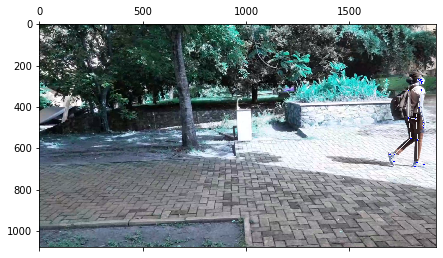

In [21]:
plt.matshow(image)

In [22]:
key_array = np.delete(myarray, 0, 0)

output = open("/home/jayasanka/Documents/gait recognition/Feature vector generator/evidence/{}".format(name), 'wb')
pickle.dump(key_array, output)
output.close()